In [1]:
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit
from qiskit import IBMQ,Aer,execute
from qiskit.visualization import plot_histogram

In [2]:
def build_state(circuit,b,a,carry):
    if a == 1:
        circuit.x(0)
    if b == 1:
        circuit.x(1)
    if carry == 1:
        circuit.x(2)
    return circuit

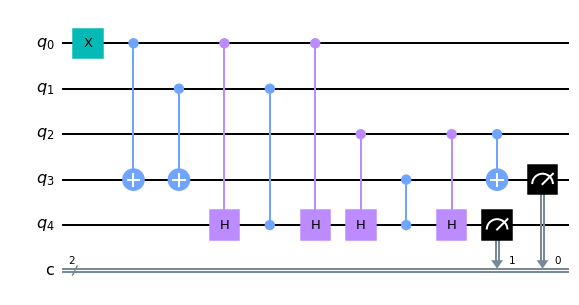

In [3]:
#### build your quantum circuit here
qc = QuantumCircuit(5,2)
qc = build_state(qc,0,1,0)
qc.cx(0,3)
qc.cx(1,3)

qc.ch(0,4)
qc.cz(1,4)
qc.ch(0,4)
qc.ch(2,4)
qc.cz(3,4)
qc.ch(2,4)
qc.cx(2,3)
qc.measure(3,0)
qc.measure(4,1)
qc.draw('mpl')

{'01': 1000}


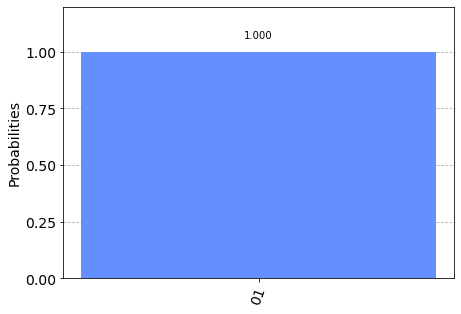

In [4]:
# execute the circuit by qasm_simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend,shots=1000)
result = job.result()
count = result.get_counts()
print(count)
plot_histogram(count)

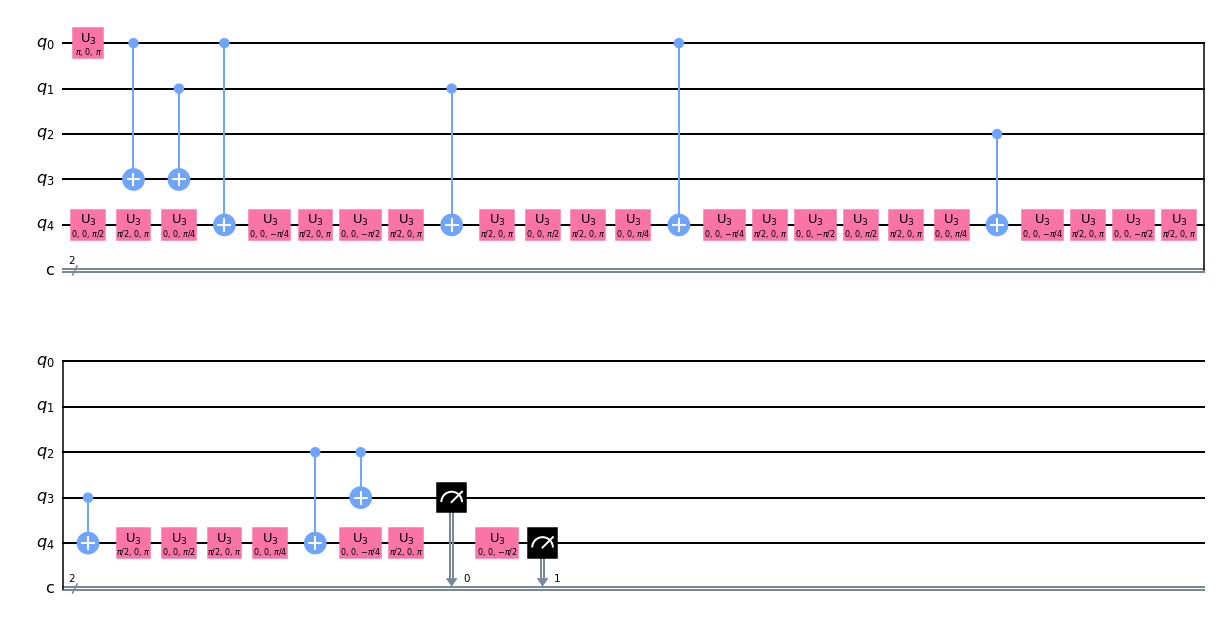

In [5]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [6]:
new_circuit.count_ops()

OrderedDict([('u3', 29), ('cx', 9), ('measure', 2)])

#### CIRCUIT COST 229
qc = QuantumCircuit(4,2)  
qc = build_state(qc,0,1,1)  
qc.ccx(0,1,3)  
qc.ccx(0,2,3)  
qc.ccx(1,2,3)  
qc.cx(0,1)  
qc.cx(2,1)  
qc.measure(1,0)  
qc.measure(3,1)  
qc.draw('mpl')

#### CIRCUIT COST 154 (HZH of above)  
qc = QuantumCircuit(4,2)  
qc = build_state(qc,0,1,1)  
qc.ch(0,3)  
qc.cz(1,3)  
qc.ch(0,3)  
qc.ch(0,3)  
qc.cz(2,3)  
qc.ch(0,3)  
qc.ch(1,3)  
qc.cz(2,3)  
qc.ch(1,3)  
qc.cx(0,1)  
qc.cx(2,1)  
qc.measure(1,0)  
qc.measure(3,1)  
qc.draw('mpl')

#### CIRCUIT COST 110
qc = QuantumCircuit(4,2)  
qc = build_state(qc,0,1,1)  
qc.ch(0,3)  
qc.cz(1,3)  
qc.ch(0,3)  
qc.cx(0,1)  
qc.ch(2,3)  
qc.cz(1,3)  
qc.ch(2,3)  
qc.cx(2,1)  
qc.measure(1,0)  
qc.measure(3,1)  
qc.draw('mpl')